## Multiple regression

First I generated the random variables A and B (with correlation 0.2).
Then I made the variable Y, which is dependent on A and A*B.

In [52]:
# generate correlated random variables A and B

library(MASS)
rawvars <- mvrnorm(n=100, mu=c(0,0), Sigma=matrix(c(0.5,0.3,0.3,0.5),nrow=2))
A <- rawvars[,1]
B <- rawvars[,2]

# making a model with a main effect of a and an interaction effect of b
Y = 2*A - 1*A*B + rnorm(100,0,0.2)

Below you can see that all variables have a significant correlation

In [53]:
cat("correlation between A and B (pvalue): ",cor.test(A,B)$p.value)
cat("\ncorrelation between A and Y (pvalue): ",cor.test(A,Y)$p.value)
cat("\ncorrelation between B and Y (pvalue): ",cor.test(B,Y)$p.value)

correlation between A and B (pvalue):  2.784801e-09
correlation between A and Y (pvalue):  0
correlation between B and Y (pvalue):  4.98066e-11

Even if you look on a figure you can see that B and Y are related.

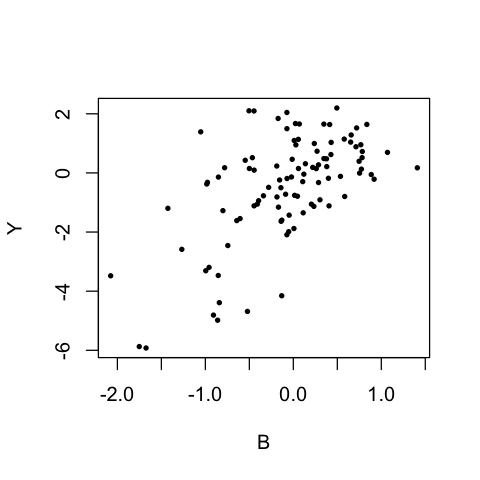

In [63]:
plot(B,Y,pch=16,cex=0.6)

But in the multiple regression, the main effect becomes (correctly) non-significant.

In [64]:
MulReg = lm(y~a+b+a*b)
summary(MulReg)


Call:
lm(formula = y ~ a + b + a * b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41320 -0.15099 -0.00176  0.14283  0.50341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01346    0.02075  -0.649    0.518    
a            1.98277    0.03152  62.914   <2e-16 ***
b           -0.01152    0.03423  -0.337    0.737    
a:b         -1.02474    0.05106 -20.070   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1997 on 96 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9771 
F-statistic:  1406 on 3 and 96 DF,  p-value: < 2.2e-16
